In [4]:
import tensorflow as tf


# Store data for x and y

x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

# Create a simple Keras model.
model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(units=1, input_shape=[1])]
)

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=500, verbose=0)

In [ ]:
# Example 1
# SavedModel to TFLite

import pathlib

# Export the SavedModel
export_dir = '/tmp/saved_model'
tf.saved_model.save(model, export_dir)

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path('/tmp/foo.tflite')
tflite_model_file.write_bytes(tflite_model)

# Example 2
## Keras to TFLite

In [ ]:
import tensorflow as tf
import pathlib

# Load the MobileNet tf.keras.model.

model = tf.keras.applications.MobileNetV2(weights="imagenet", input_shape=(224, 224, 3))

# Saving the model for later use by tflite_convert
model.save('model.h5')

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model
tflite_model_file = pathlib.Path('/tmp/foo.tflite')
tflite_model_file.write_bytes(tflite_model)

# Command-line usage

```bash
#!/usr/bin/env bash

# Saving with the command-line from a SavedModel
tflite_convert --output_file=model.tflite --saved_model_dir=/tmp/saved_model

# Saving with the command-line from a Keras model
tflite_convert --output_file=model.tflite --keras_model_file=model.h5

```

# Quantization

## Post-training quantization

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]

tflite_quant_model = converter.convert()

# Post-training integer quantization

In [ ]:
# Define the generator

def generator():
  data = tfds.load(name="mnist", as_supervised=True)
  for _ in range(num_calibration_steps):
    image, = data.take(1)
    yield [image]

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

# Set the optimizatoin mode
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Pass the representative dataset to the converter
converter.representative_dataset = tf.lite.RepresentativeDataset(generator)

# Full-integer quantization

In [ ]:
# Set the optimization model
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_LATENCY]

# Pass the representative dataset to the converter
converter.representative_dataset = tf.lite.RepresentativeDataset(generator)

# Restricting supported target op specification to INT8
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]

# TF-Select

In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)

converter.target_ops = [tf.lite.OpsSet.TFLITE_BUILTINS,
                        tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

# TensorFlow Lite Interpreter in Python

In [ ]:
# Load TFLite model and allocate tensors

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Point the data to be used for testing and run the interpreter
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

tflite_results = interpreter.get_tensor(output_details[0]['index'])

# Converting a model to TFLite

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

import pathlib
import matplotlib.pyplot as plt
from google.colab import files

%matplotlib inline

# Create a basic model of the form y = mx + c


In [2]:
# Create a simple Keras model
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=0)

# Generate a SavedModel

In [3]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/1/assets


# Convert the SavedModel to TFLite

In [4]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [5]:
tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)

764

# Initialize the TFLite interpreter to try it out

In [6]:
# Load TFLite model and allocate tensors.

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [8]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []

for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

#  Visualize the model

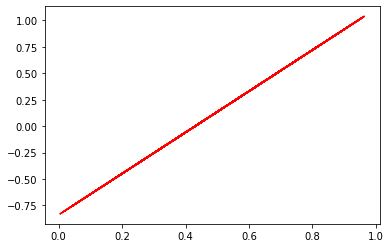

In [9]:
plt.plot(inputs, outputs, 'r')
plt.show()

# Download the TFLite model file

In [10]:
files.download(tflite_model_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>